In [236]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [237]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [238]:
# define paths for the datasets to be used
path_rental = "Average Rents_Concat.csv"
path_units = "Number_of_Units_Concat.csv"
path_vacancy = "Vacancy Rate Concat.csv"

In [239]:
#read into files to see the column names to create a function
rental_df = pd.read_csv(path_rental)
rental_df.columns


Index(['Province', 'Centre', 'Zone', 'Neighbourhood', 'Dwelling Type ',
       'Bachelor ', '1 Bedroom', '2 Bedroom', '3 Bedroom +', 'Total ', 'Year'],
      dtype='object')

In [240]:
# units_df = units_df.loc[(units_df["Year"] == 2022 )& (units_df["Province"] == "Que")]
# units_df["Total "].sum()

In [241]:
#identify how provinces are named in the dataset
print(rental_df["Province"].unique())


['Nfld.Lab.' 'N.S.' 'N.B.' 'Que' 'Ont.' 'Man.' 'Sask.' 'Alta' 'B.C.']


In [242]:
#Create a funtion to extract based on the province and year 
def data_set(filepath,Province,Year,column):
    get_df = pd.read_csv(filepath)
    df = get_df.loc[(rental_df["Year"] == Year )& (get_df["Province"] == Province)]
    df_Province = df[(df[column]!=0)]
    return df_Province
    

In [243]:
#Check if the function works fine and get the provinces
Year = 2022
column = "3 Bedroom +"
df_Ontario = data_set(path_rental, "Ont.",Year,column)
df_Quebec = data_set(path_rental,"Que",Year,column)
df_BC = data_set(path_rental, "B.C.",Year,column)
df_Alberta = data_set(path_rental, "Alta",Year,column)
df_sask = data_set(path_rental,"Sask.",Year,column)
df_NovaScotia = data_set(path_rental,"N.S.",Year,column)

In [244]:
#define Provinces name in the list
Province = ['Ont.', "Que" ,"Alta",'B.C.', "Sask.","N.S."]


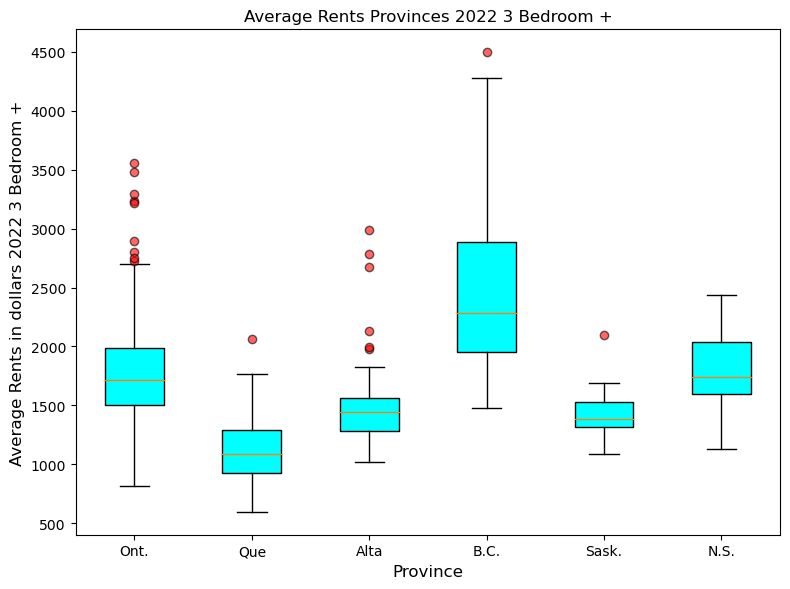

In [245]:
# create plots using the column for we want to focus on
x_data = [df_Ontario[column],df_Quebec[column],df_Alberta[column],df_BC[column],df_sask[column],df_NovaScotia[column]]
out_patch = dict(markerfacecolor = "red", marker = "o",alpha = 0.6)
box_plot = plt.boxplot(x = x_data,labels = Province, flierprops = out_patch,patch_artist = True)
color = ["Cyan"]
colors = color*9
plt.xlabel("Province",fontsize = 12)
plt.ylabel(f"Average Rents in dollars {Year} {column}",fontsize = 12)
plt.title(f"Average Rents Provinces {Year} {column}",fontsize = 12)

for patch,color in zip(box_plot["boxes"],colors):
    patch.set_facecolor(color)
plt.savefig(f"Average Rents Provinces {Year} {column}.png")          
plt.show()

In [246]:
#get columns for Ontario
df_Ontario.columns

Index(['Province', 'Centre', 'Zone', 'Neighbourhood', 'Dwelling Type ',
       'Bachelor ', '1 Bedroom', '2 Bedroom', '3 Bedroom +', 'Total ', 'Year'],
      dtype='object')

In [247]:
#get unique names to make a list for further analysis
df_Ontario["Centre"].unique()

array(['Barrie', 'Belleville', 'Brantford', 'Guelph', 'Hamilton',
       'Kingston', 'Kitchener - Cambridge - Waterl', 'London',
       'St. Catharines - Niagara', 'Oshawa', 'Ottawa', 'Peterborough',
       'Greater Sudbury / Grand Sudbur', 'Thunder Bay', 'Toronto',
       'Windsor'], dtype=object)

In [248]:
# make a list to plot and use in the box plot x axis label
Centre_of_interest = ['Barrie', "Hamilton",
       'Kingston', 'Kitchener - Cambridge - Waterl', 'London',
       'St. Catharines - Niagara', 'Oshawa', 'Ottawa', 'Toronto',
       'Windsor']

In [249]:
#get the data for the column  and the y axis 
Centre_data = []
for each in Centre_of_interest:
    df = df_Ontario[(df_Ontario["Centre"])==each]
    Centre_data.append(df[column])
    

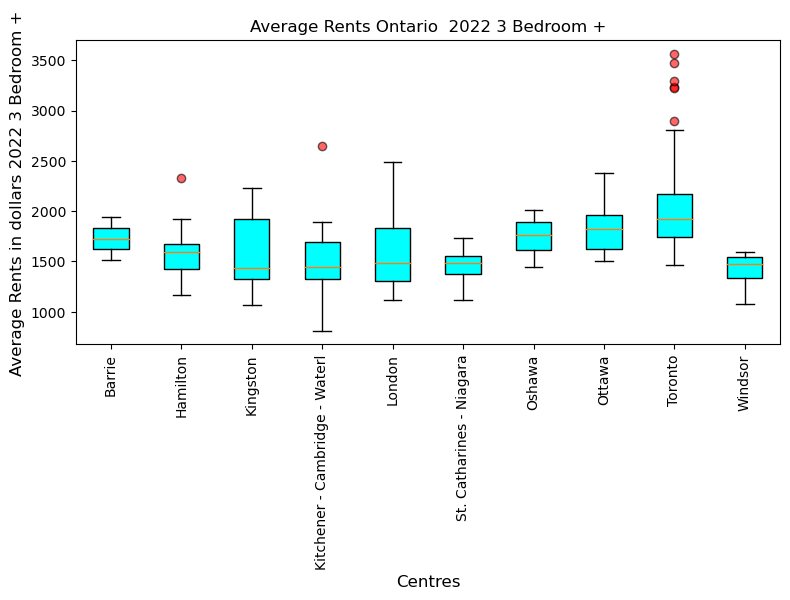

In [250]:
# plot the data for the province based on the zones
x_data = Centre_data
plt.rcParams["figure.figsize"] = [8,6]
plt.rcParams["figure.autolayout"] = True
box_plot = plt.boxplot(x = x_data,labels = Centre_of_interest, flierprops = out_patch,patch_artist = True)
color = ["Cyan"]
colors = color*len(Centre_of_interest)
plt.xlabel("Centres",fontsize = 12)
plt.ylabel(f"Average Rents in dollars {Year} {column}",fontsize = 12,)
plt.title(f"Average Rents Ontario  {Year} {column}",fontsize = 12)
plt.xticks(rotation = 90)
for patch,color in zip(box_plot["boxes"],colors):
    patch.set_facecolor(color)
plt.savefig(f"Average Rents Ontario {Year} {column}.png") 
plt.tight_layout
plt.show()

In [251]:
# extract data for Toronto
df_Toronto = df_Ontario[(df_Ontario["Centre"]=="Toronto")]

In [252]:
df_Toronto

,Province,Centre,Zone,Neighbourhood,Dwelling Type,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total,Year
8067,Ont.,Toronto,Toronto (Central),Moss Park/Regent Park,Apt & Other,1274.0,1824.0,2340.0,3237.0,1930.0,2022
8071,Ont.,Toronto,Toronto (Central),North St. James Town,Apt & Other,1376.0,1676.0,2003.0,2266.0,1743.0,2022
8073,Ont.,Toronto,Toronto (Central),Church-Yonge Corridor,Apt & Other,1486.0,1693.0,2201.0,3219.0,1721.0,2022
8079,Ont.,Toronto,Toronto (Central),University/Annex,Apt & Other,1581.0,1758.0,2391.0,3477.0,1912.0,2022
8093,Ont.,Toronto,Toronto (North),Moore Park,Apt & Other,0.0,1837.0,2360.0,3292.0,2035.0,2022
...,...,...,...,...,...,...,...,...,...,...,...
8311,Ont.,Toronto,Richmond Hill/Vaughan/King,Richmond Hill/Vaughan/King,Apt & Other,1315.0,1348.0,1580.0,2031.0,1522.0,2022
8321,Ont.,Toronto,Markham,Markham,Apt & Other,0.0,1431.0,1593.0,1770.0,1530.0,2022
8323,Ont.,Toronto,Pickering/Ajax/Uxbridge,Ajax/Pickering,Apt & Other,0.0,1193.0,1533.0,1608.0,1556.0,2022
8327,Ont.,Toronto,Milton/Halton Hills,Milton/Halton Hills,Apt & Other,911.0,1309.0,1523.0,1791.0,1444.0,2022


In [253]:
# get unique zones
df_Toronto["Zone"].unique()

array(['Toronto (Central)', 'Toronto (North)', 'Toronto (West)',
       'Etobicoke (South)', 'Etobicoke (Central)', 'Etobicoke (North)',
       'York', 'East York', 'Scarborough (Central)',
       'Scarborough (North)', 'Scarborough (East)',
       'North York (Southeast)', 'North York (Northeast)',
       'North York (Southwest)', 'North York (N.Central)',
       'North York (Northwest)', 'Mississauga (South)',
       'Mississauga (Northwest)', 'Mississauga (Northeast)',
       'Brampton (West)', 'Brampton (East)', 'Oakville',
       'Richmond Hill/Vaughan/King', 'Markham', 'Pickering/Ajax/Uxbridge',
       'Milton/Halton Hills', 'Orangeville/Mono'], dtype=object)

In [254]:
Zones_of_interest = ['Toronto (Central)', 'Toronto (North)', 'Toronto (West)',
       'Etobicoke (South)', 'Etobicoke (Central)', 'Etobicoke (North)',
       'York', 'East York', 'Scarborough (Central)',
       'Scarborough (North)', 'Scarborough (East)',
       'North York (Southeast)', 'North York (Northeast)',
       'North York (Southwest)', 'North York (N.Central)',
       'North York (Northwest)', 'Mississauga (South)',
       'Mississauga (Northwest)', 'Mississauga (Northeast)',
       'Brampton (West)', 'Oakville']

In [255]:
Zonal_data = []
for each in Zones_of_interest:
    df = df_Toronto[(df_Toronto["Zone"])==each]
    Zonal_data.append(df[column])
    
    

In [256]:
Zonal_data

[8067    3237.0
 8071    2266.0
 8073    3219.0
 8079    3477.0
 Name: 3 Bedroom +, dtype: float64,
 8093    3292.0
 8095    2722.0
 8103    2654.0
 8111    2698.0
 Name: 3 Bedroom +, dtype: float64,
 8113    2049.0
 8117    2895.0
 Name: 3 Bedroom +, dtype: float64,
 8129    1882.0
 8133    1778.0
 8139    1981.0
 Name: 3 Bedroom +, dtype: float64,
 8143    1901.0
 8145    2101.0
 8149    2676.0
 8151    2802.0
 8155    2197.0
 8156    2009.0
 8157    1930.0
 Name: 3 Bedroom +, dtype: float64,
 8165    1897.0
 Name: 3 Bedroom +, dtype: float64,
 8167    2754.0
 8177    2153.0
 8181    1721.0
 Name: 3 Bedroom +, dtype: float64,
 8187    2353.0
 8193    1659.0
 8195    1807.0
 8199    1989.0
 Name: 3 Bedroom +, dtype: float64,
 8205    1650.0
 8207    1735.0
 8209    1475.0
 8215    1688.0
 8217    1811.0
 8219    2442.0
 8221    1768.0
 Name: 3 Bedroom +, dtype: float64,
 8223    1761.0
 8225    1756.0
 8227    1899.0
 Name: 3 Bedroom +, dtype: float64,
 8229    2016.0
 8235    1664.0


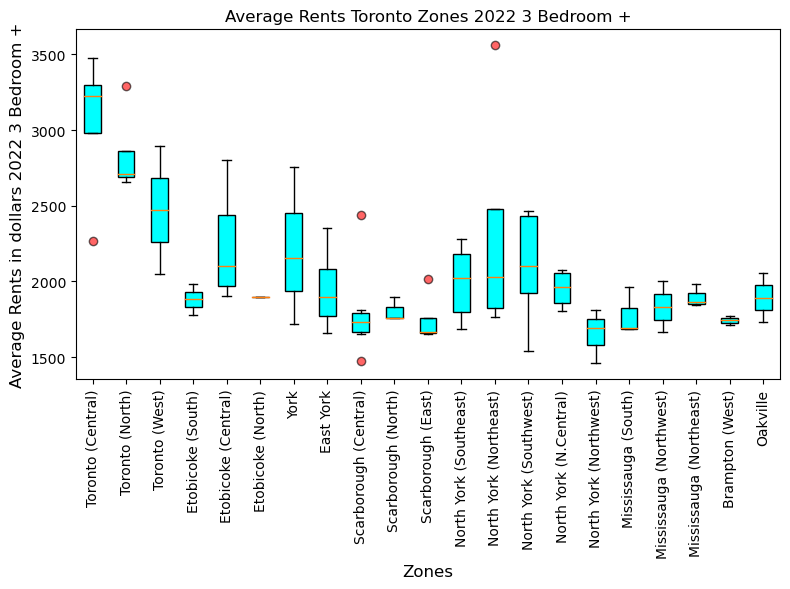

In [257]:
#plot the data
x_data = Zonal_data
plt.rcParams["figure.figsize"] = [8,6]
plt.rcParams["figure.autolayout"] = True
box_plot = plt.boxplot(x = x_data,labels = Zones_of_interest, flierprops = out_patch,patch_artist = True)
color = ["Cyan"]
colors = color*len(Zones_of_interest)
plt.xlabel("Zones",fontsize = 12)
plt.ylabel(f"Average Rents in dollars {Year} {column}",fontsize = 12,)
plt.title(f"Average Rents Toronto Zones {Year} {column}",fontsize = 12)
plt.xticks(rotation = 90)
for patch,color in zip(box_plot["boxes"],colors):
    patch.set_facecolor(color)
plt.savefig(f"Average Rents Toronto {Year} {column}.png") 
plt.tight_layout
plt.show()